In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from utils import globalsettings as gs

In [3]:
df = pd.read_csv(gs.the_files.ATTRITION)

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [5]:
# Información general del DataFrame, incluyendo tipos de datos, valores no nulos, etc.
df_info = df.info()

# Resumen de estadísticas descriptivas para las columnas numéricas
df_description = df.describe()

df_info, df_description.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

(None,
                Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
 count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
 mean     36.923810   802.485714          9.192517     2.912925            1.0   
 std       9.135373   403.509100          8.106864     1.024165            0.0   
 min      18.000000   102.000000          1.000000     1.000000            1.0   
 25%      30.000000   465.000000          2.000000     2.000000            1.0   
 
        EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
 count     1470.000000              1470.000000  1470.000000     1470.000000   
 mean      1024.865306                 2.721769    65.891156        2.729932   
 std        602.024335                 1.093082    20.329428        0.711561   
 min          1.000000                 1.000000    30.000000        1.000000   
 25%        491.250000                 2.000000    48.000000        2.000000   
 
           JobLev

# GCD + EDA

## Missings

In [6]:
import numpy as np

# Creando una copia del DataFrame original
df_with_missing = df.copy()

# Estableciendo una semilla para la reproducibilidad
np.random.seed(42)

# Seleccionando aleatoriamente un porcentaje de celdas e introduciendo valores NaN
mask = np.random.choice([True, False], size=df_with_missing.shape, p=[0.05, 0.95])
df_with_missing[mask] = np.nan

# Calculando la cantidad de valores nulos en cada columna
missing_values_with_missing_data = df_with_missing.isnull().sum()

# Mostrando las columnas con valores nulos
missing_values_with_missing_data[missing_values_with_missing_data > 0]


Age                         76
Attrition                   73
BusinessTravel              82
DailyRate                   71
Department                  84
DistanceFromHome            77
Education                   65
EducationField              59
EmployeeCount               81
EmployeeNumber              60
EnvironmentSatisfaction     65
Gender                      79
HourlyRate                  65
JobInvolvement              72
JobLevel                    77
JobRole                     74
JobSatisfaction             82
MaritalStatus               78
MonthlyIncome               57
MonthlyRate                 56
NumCompaniesWorked          67
Over18                      71
OverTime                    86
PercentSalaryHike           73
PerformanceRating           70
RelationshipSatisfaction    64
StandardHours               75
StockOptionLevel            78
TotalWorkingYears           78
TrainingTimesLastYear       77
WorkLifeBalance             74
YearsAtCompany              85
YearsInC

1. Imputación Media/Mediana/Moda

Podemos reemplazar los valores faltantes en las columnas numéricas con la media o la mediana de esa columna. Para las columnas categóricas, podríamos usar la moda.

2. Imputación Interpolación

Para datos secuenciales o temporales, la interpolación puede ser una opción, donde los valores faltantes se estiman en función de los valores circundantes.

3. Imputación Utilizando Modelos de Aprendizaje Automático

Podemos entrenar modelos de aprendizaje automático (como k-NN, árboles de decisión) para predecir los valores faltantes en función de otras características.

4. Imputación Múltiple

La imputación múltiple es una técnica más sofisticada que crea múltiples imputaciones para cada valor faltante y luego combina los resultados.

Para este caso, podríamos comenzar con una imputación simple usando la media para las columnas numéricas y la moda para las columnas categóricas. 

In [7]:
from sklearn.impute import SimpleImputer

# Creando un imputador para valores numéricos (usando la media)
numeric_imputer = SimpleImputer(strategy="mean")

# Aplicando la imputación a las columnas numéricas
df_with_missing[df_with_missing.select_dtypes(include=['number']).columns] = numeric_imputer.fit_transform(
    df_with_missing.select_dtypes(include=['number'])
)

# Creando un imputador para valores categóricos (usando la moda)
categorical_imputer = SimpleImputer(strategy="most_frequent")

# Aplicando la imputación a las columnas categóricas
df_with_missing[df_with_missing.select_dtypes(include=['object']).columns] = categorical_imputer.fit_transform(
    df_with_missing.select_dtypes(include=['object'])
)

# Verificando si aún hay valores nulos
missing_values_after_imputation = df_with_missing.isnull().sum()
missing_values_after_imputation[missing_values_after_imputation > 0]


# Renombrando el DataFrame como "df_eda"
df_eda = df_with_missing


## Distribución por categorías

In [8]:
# Calculando la distribución por categorías para las columnas seleccionadas
category_columns = ['Attrition', 'BusinessTravel', 'Department', 'EducationField']
category_distributions = {col: df_eda[col].value_counts(normalize=True) * 100 for col in category_columns}

# Mostrando la distribución por categorías
category_distributions


{'Attrition': Attrition
 No     84.693878
 Yes    15.306122
 Name: proportion, dtype: float64,
 'BusinessTravel': BusinessTravel
 Travel_Rarely        72.380952
 Travel_Frequently    17.823129
 Non-Travel            9.795918
 Name: proportion, dtype: float64,
 'Department': Department
 Research & Development    67.278912
 Sales                     28.503401
 Human Resources            4.217687
 Name: proportion, dtype: float64,
 'EducationField': EducationField
 Life Sciences       43.061224
 Medical             30.476190
 Marketing           10.544218
 Technical Degree     8.707483
 Other                5.442177
 Human Resources      1.768707
 Name: proportion, dtype: float64}

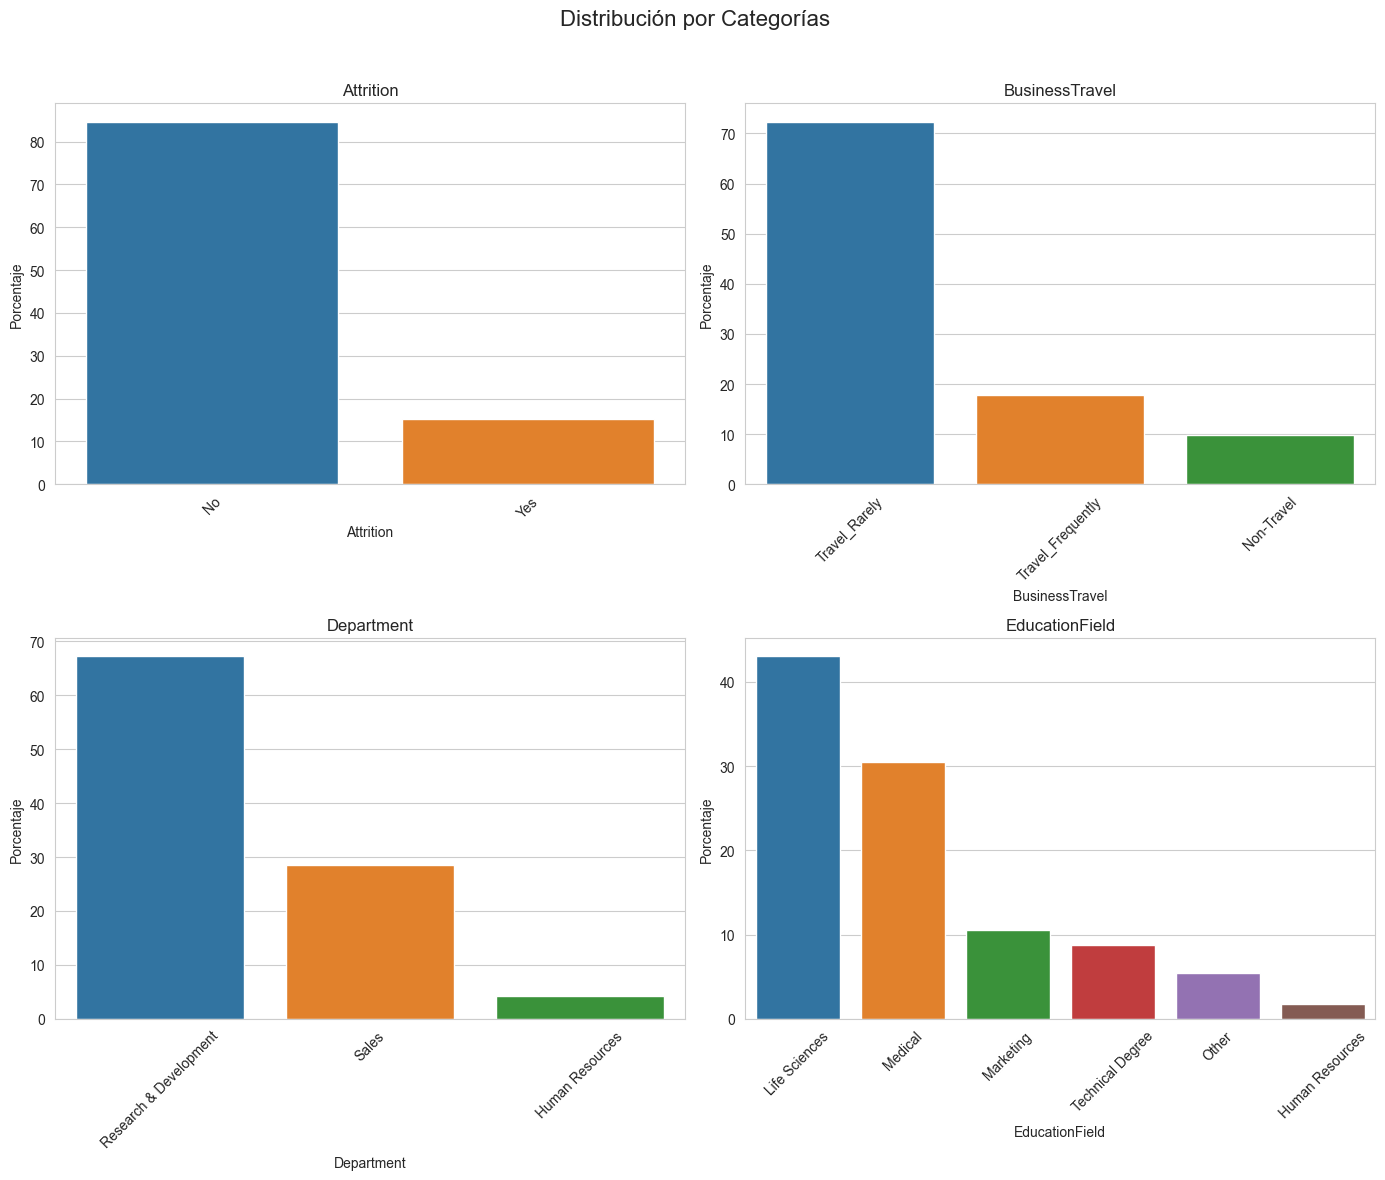

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurando el estilo de los gráficos
sns.set_style("whitegrid")

# Creando subplots para visualizar las distribuciones por categorías
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Distribución por Categorías', fontsize=16)

# Creando gráficos de barras para cada columna categórica
for ax, col in zip(axes.flatten(), category_columns):
    sns.barplot(x=category_distributions[col].index, y=category_distributions[col].values, ax=ax)
    ax.set_title(col)
    ax.set_ylabel('Porcentaje')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


# Axis

En pandas, el término "axis" se refiere a las dimensiones de un DataFrame o Serie. Es un concepto fundamental para entender cómo operar con los datos en pandas. Aquí está cómo funciona:

+ `axis=0`: Refiere al eje vertical y se relaciona con las filas. Cuando aplicas una operación a lo largo de axis=0, la operación se realiza a lo largo de las filas, es decir, en la dirección vertical. Por ejemplo, al sumar utilizando axis=0, obtendrás la suma de cada columna.

+ `axis=1`: Refiere al eje horizontal y se relaciona con las columnas. Cuando aplicas una operación a lo largo de axis=1, la operación se realiza a lo largo de las columnas, es decir, en la dirección horizontal. Por ejemplo, al sumar utilizando axis=1, obtendrás la suma de cada fila.

# Equivalencias a `dplyr`

1. Select (Seleccionar Columnas)

In [10]:
# Seleccionando columnas específicas usando corchetes
selected_columns_brackets = df_eda[["Age", "Department", "MonthlyIncome"]]

# Seleccionando columnas específicas usando el método .loc
selected_columns_loc = df_eda.loc[:, ["Age", "Department", "MonthlyIncome"]]

# Mostrando las primeras filas de la selección
selected_columns_brackets.head()


,Age,Department,MonthlyIncome
0,41.0,Sales,5993.0
1,49.0,Research & Development,5130.0
2,37.0,Research & Development,2090.0
3,33.0,Research & Development,2909.0
4,27.0,Research & Development,3468.0


2. Filter (Filtrar Filas)

El verbo "filter" en dplyr se utiliza para filtrar filas basadas en una o más condiciones. En pandas, puedes hacer esto utilizando corchetes [] con una condición booleana.

In [11]:
# Filtrando filas basadas en condiciones específicas
filtered_rows = df_eda[(df_eda['Age'] > 40) & (df_eda['Department'] == 'Sales')]

# Mostrando las primeras filas del resultado filtrado
filtered_rows.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.0,2.000000,Life Sciences,1.0,1.0,...,1.0,80.0,0.0,8.0,2.79397,1.0,6.0,4.0,0.0,5.0
18,53.0,No,Travel_Rarely,1219.0,Sales,2.0,4.000000,Life Sciences,1.0,23.0,...,3.0,80.0,0.0,31.0,3.00000,3.0,25.0,8.0,3.0,7.0
48,46.0,No,Travel_Frequently,1211.0,Sales,5.0,4.000000,Marketing,1.0,62.0,...,3.0,80.0,0.0,14.0,4.00000,3.0,9.0,6.0,0.0,8.0
52,44.0,No,Travel_Rarely,1488.0,Sales,1.0,2.913167,Marketing,1.0,68.0,...,3.0,80.0,1.0,9.0,2.00000,2.0,4.0,3.0,1.0,3.0
63,59.0,No,Travel_Rarely,1435.0,Sales,25.0,3.000000,Life Sciences,1.0,81.0,...,4.0,80.0,0.0,28.0,3.00000,2.0,21.0,16.0,7.0,9.0


3. Mutate (Modificar o Crear Columnas)

El verbo "mutate" en dplyr se utiliza para modificar o crear nuevas columnas basadas en las columnas existentes. En pandas, puedes hacer esto simplemente asignando una nueva columna con una expresión que involucre las columnas existentes.

In [12]:
# Creando una nueva columna basada en una columna existente
df_eda['MonthlyIncomeInK'] = df_eda['MonthlyIncome'] / 1000

# Mostrando las primeras filas para verificar la nueva columna
df_eda[['MonthlyIncome', 'MonthlyIncomeInK']].head()


,MonthlyIncome,MonthlyIncomeInK
0,5993.0,5.993
1,5130.0,5.130
2,2090.0,2.090
3,2909.0,2.909
4,3468.0,3.468


4. Group By (Agrupar por Columnas) + Summarise

El verbo "group_by" en dplyr se utiliza para agrupar los datos por una o más columnas. En pandas, puedes hacer esto utilizando el método .groupby.

In [13]:
# Agrupando por la columna "Department" y calculando la media de "MonthlyIncome"
grouped_by_department = df_eda.groupby('Department')['MonthlyIncome'].mean().reset_index()

# Renombrando las columnas para una mejor presentación
grouped_by_department.columns = ['Department', 'Average Monthly Income']

# Mostrando el resultado
grouped_by_department


,Department,Average Monthly Income
0,Human Resources,6727.822581
1,Research & Development,6303.004358
2,Sales,6969.056180


5. Rename (Renombrar Columnas)

El verbo "rename" en dplyr se utiliza para renombrar una o más columnas en un DataFrame. En pandas, puedes hacer esto utilizando el método .rename.

In [14]:
# Renombrando la columna "MonthlyIncomeInK" a "IncomeInK"
df_eda.rename(columns={'MonthlyIncomeInK': 'IncomeInK'}, inplace=True)

# Mostrando las primeras filas para verificar el cambio de nombre
df_eda[['MonthlyIncome', 'IncomeInK']].head()


,MonthlyIncome,IncomeInK
0,5993.0,5.993
1,5130.0,5.130
2,2090.0,2.090
3,2909.0,2.909
4,3468.0,3.468


## Advanced

1. Select If / Rename If (Seleccionar/Renombrar si cumple una Condición)

En pandas, puedes utilizar una comprensión de lista junto con una condición para seleccionar o renombrar columnas que cumplan una condición específica.

In [15]:
# Seleccionando todas las columnas numéricas
selected_numeric_columns = df_eda.select_dtypes(include=['number'])

# Mostrando las primeras filas de la selección
selected_numeric_columns.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomeInK
0,41.0,1102.0,1.000000,2.0,1.0,1.0,2.729537,94.0,3.0,2.0,...,80.0,0.0,8.000000,2.79397,1.000000,6.00000,4.0,0.0,5.0,5.993
1,49.0,279.0,8.000000,1.0,1.0,2.0,3.000000,61.0,2.0,2.0,...,80.0,1.0,10.000000,3.00000,3.000000,10.00000,7.0,1.0,7.0,5.130
2,37.0,1373.0,2.000000,2.0,1.0,4.0,4.000000,92.0,2.0,1.0,...,80.0,0.0,11.305316,3.00000,2.755014,0.00000,0.0,0.0,0.0,2.090
3,33.0,1392.0,3.000000,4.0,1.0,5.0,4.000000,56.0,3.0,1.0,...,80.0,0.0,8.000000,3.00000,3.000000,8.00000,7.0,3.0,0.0,2.909
4,27.0,591.0,9.184494,1.0,1.0,7.0,1.000000,40.0,3.0,1.0,...,80.0,1.0,11.305316,3.00000,3.000000,6.94657,2.0,2.0,2.0,3.468


In [16]:
# Renombrando todas las columnas numéricas añadiendo el sufijo "_num"
df_eda.rename(columns={col: col + '_num' for col in df_eda.select_dtypes(include=['number']).columns}, inplace=True)

# Mostrando las primeras filas para verificar el cambio de nombre
df_eda.head()


,Age_num,Attrition,BusinessTravel,DailyRate_num,Department,DistanceFromHome_num,Education_num,EducationField,EmployeeCount_num,EmployeeNumber_num,...,StandardHours_num,StockOptionLevel_num,TotalWorkingYears_num,TrainingTimesLastYear_num,WorkLifeBalance_num,YearsAtCompany_num,YearsInCurrentRole_num,YearsSinceLastPromotion_num,YearsWithCurrManager_num,IncomeInK_num
0,41.0,Yes,Travel_Rarely,1102.0,Sales,1.000000,2.0,Life Sciences,1.0,1.0,...,80.0,0.0,8.000000,2.79397,1.000000,6.00000,4.0,0.0,5.0,5.993
1,49.0,No,Travel_Frequently,279.0,Research & Development,8.000000,1.0,Life Sciences,1.0,2.0,...,80.0,1.0,10.000000,3.00000,3.000000,10.00000,7.0,1.0,7.0,5.130
2,37.0,Yes,Travel_Rarely,1373.0,Research & Development,2.000000,2.0,Other,1.0,4.0,...,80.0,0.0,11.305316,3.00000,2.755014,0.00000,0.0,0.0,0.0,2.090
3,33.0,No,Travel_Frequently,1392.0,Research & Development,3.000000,4.0,Life Sciences,1.0,5.0,...,80.0,0.0,8.000000,3.00000,3.000000,8.00000,7.0,3.0,0.0,2.909
4,27.0,No,Travel_Rarely,591.0,Research & Development,9.184494,1.0,Medical,1.0,7.0,...,80.0,1.0,11.305316,3.00000,3.000000,6.94657,2.0,2.0,2.0,3.468


Select at / Rename at

Para las operaciones "_at" (como "select_at" y "rename_at" en dplyr), puedes seleccionar o renombrar columnas basadas en sus nombres o índices específicos.

Por ejemplo, en pandas, puedes seleccionar columnas específicas utilizando df[['col1', 'col2']] o renombrar columnas específicas utilizando df.rename(columns={'col1': 'new_col1', 'col2': 'new_col2'}).

Mutate If (Modificar Columnas si Cumplen una Condición)
Puedes modificar columnas en pandas que cumplan una condición específica utilizando una comprensión de lista junto con una condición.



In [17]:
# Aplicando una transformación a todas las columnas numéricas
for col in df_eda.select_dtypes(include=['number']).columns:
    df_eda[col] = df_eda[col] / 2

# Mostrando las primeras filas para verificar la transformación
df_eda.head()


,Age_num,Attrition,BusinessTravel,DailyRate_num,Department,DistanceFromHome_num,Education_num,EducationField,EmployeeCount_num,EmployeeNumber_num,...,StandardHours_num,StockOptionLevel_num,TotalWorkingYears_num,TrainingTimesLastYear_num,WorkLifeBalance_num,YearsAtCompany_num,YearsInCurrentRole_num,YearsSinceLastPromotion_num,YearsWithCurrManager_num,IncomeInK_num
0,20.5,Yes,Travel_Rarely,551.0,Sales,0.500000,1.0,Life Sciences,0.5,0.5,...,40.0,0.0,4.000000,1.396985,0.500000,3.000000,2.0,0.0,2.5,2.9965
1,24.5,No,Travel_Frequently,139.5,Research & Development,4.000000,0.5,Life Sciences,0.5,1.0,...,40.0,0.5,5.000000,1.500000,1.500000,5.000000,3.5,0.5,3.5,2.5650
2,18.5,Yes,Travel_Rarely,686.5,Research & Development,1.000000,1.0,Other,0.5,2.0,...,40.0,0.0,5.652658,1.500000,1.377507,0.000000,0.0,0.0,0.0,1.0450
3,16.5,No,Travel_Frequently,696.0,Research & Development,1.500000,2.0,Life Sciences,0.5,2.5,...,40.0,0.0,4.000000,1.500000,1.500000,4.000000,3.5,1.5,0.0,1.4545
4,13.5,No,Travel_Rarely,295.5,Research & Development,4.592247,0.5,Medical,0.5,3.5,...,40.0,0.5,5.652658,1.500000,1.500000,3.473285,1.0,1.0,1.0,1.7340


Mutate At (Modificar Columnas Específicas)

Puedes modificar columnas específicas en pandas utilizando una lista de nombres de columna o índices.

In [18]:
# Aplicando una transformación a columnas específicas
df_eda[['Age_num', 'IncomeInK_num']] = df_eda[['Age_num', 'IncomeInK_num']] * 10

# Mostrando las primeras filas para verificar la transformación
df_eda[['Age_num', 'IncomeInK_num']].head()


,Age_num,IncomeInK_num
0,205.0,29.965
1,245.0,25.650
2,185.0,10.450
3,165.0,14.545
4,135.0,17.340


Filter If (Filtrar si cumple una Condición)

Puedes filtrar filas en pandas que cumplan una condición específica en una o varias columnas utilizando una expresión booleana.

In [19]:
df.select_dtypes(include=['number']).gt(0).all(axis=1)

0       False
1        True
2       False
3       False
4        True
        ...  
1465    False
1466     True
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

In [20]:
# Filtrando filas donde todas las columnas numéricas sean mayores que 0
filtered_if_df = df[df.select_dtypes(include=['number']).gt(0).all(axis=1)]

# Mostrando las primeras filas del DataFrame filtrado
filtered_if_df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
12,31,No,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,4,80,1,5,1,2,5,2,4,3
15,29,No,Travel_Rarely,1389,Research & Development,21,4,Life Sciences,1,20,...,3,80,1,10,1,3,10,9,8,8


Filter At (Filtrar Columnas Específicas)

Puedes filtrar filas en pandas basadas en condiciones en columnas específicas utilizando una expresión booleana con los nombres de las columnas.

In [21]:
# Filtrando filas donde "Age" es mayor que 30 y "DailyRate" es mayor que 1000
filtered_at_df = df[(df['Age'] > 30) & (df['DailyRate'] > 1000)]

# Mostrando las primeras filas del DataFrame filtrado
filtered_at_df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0



1. Summarize If (Resumir si Cumple una Condición)

Puedes aplicar funciones de resumen a columnas en pandas que cumplan una condición específica.


In [22]:
# Calculando la media de todas las columnas numéricas
summary_if = df.select_dtypes(include=['number']).mean()

# Mostrando el resumen
summary_if


Age                            36.923810
DailyRate                     802.485714
DistanceFromHome                9.192517
Education                       2.912925
EmployeeCount                   1.000000
EmployeeNumber               1024.865306
EnvironmentSatisfaction         2.721769
HourlyRate                     65.891156
JobInvolvement                  2.729932
JobLevel                        2.063946
JobSatisfaction                 2.728571
MonthlyIncome                6502.931293
MonthlyRate                 14313.103401
NumCompaniesWorked              2.693197
PercentSalaryHike              15.209524
PerformanceRating               3.153741
RelationshipSatisfaction        2.712245
StandardHours                  80.000000
StockOptionLevel                0.793878
TotalWorkingYears              11.279592
TrainingTimesLastYear           2.799320
WorkLifeBalance                 2.761224
YearsAtCompany                  7.008163
YearsInCurrentRole              4.229252
YearsSinceLastPr

Summarize At (Resumir Columnas Específicas)

Puedes aplicar funciones de resumen a columnas específicas en pandas.

In [23]:
# Calculando la suma de las columnas específicas "Age" y "DailyRate"
summary_at = df[["Age", "DailyRate"]].sum()

# Mostrando el resumen
summary_at


Age            54278
DailyRate    1179654
dtype: int64


###  Selection helpers 



1. starts_with (Empieza con)

Selecciona columnas cuyos nombres comiencen con una cadena específica.


In [32]:
# Seleccionando columnas que empiecen con "Age"
starts_with_age = df.filter(regex='^Age')

# Mostrando las primeras filas
starts_with_age.head()


,Age
0,41
1,49
2,37
3,33
4,27


2. ends_with (Termina con)

In [30]:
# Seleccionando columnas que terminen con "Level"
ends_with_num = df.filter(regex='Level$')

# Mostrando las primeras filas
ends_with_num.head()


,JobLevel,StockOptionLevel
0,2,0
1,2,1
2,1,0
3,1,0
4,1,1


3. contains (Contiene)




In [31]:
# Seleccionando columnas que contengan "Rate"
contains_rate = df.filter(like='Rate')

# Mostrando las primeras filas
contains_rate.head()

,DailyRate,HourlyRate,MonthlyRate
0,1102,94,19479
1,279,61,24907
2,1373,92,2396
3,1392,56,23159
4,591,40,16632


4. matches (Coincide con Expresión Regular)

In [33]:
# Seleccionando columnas que coincidan con la expresión regular
# (columnas que contienen una vocal seguida de la letra "a")
matches_regex = df.filter(regex='[aeiou]a')

# Mostrando las primeras filas
matches_regex.head()


,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,8,0,6,4,0,5
1,10,3,10,7,1,7
2,7,3,0,0,0,0
3,8,3,8,7,3,0
4,6,3,2,2,2,2



### rowwise

En pandas, puedes lograr algo similar utilizando el método apply con axis=1, lo cual permite aplicar una función a lo largo de las filas de un DataFrame. Esto te da la flexibilidad de trabajar con todas las columnas de una fila a la vez.

In [34]:
# Definiendo una función que suma dos columnas para cada fila
def calculate_sum(row):
    return row['Age'] + row['DailyRate']

# Aplicando la función a lo largo de las filas (axis=1) para calcular la suma
df['AgePlusDailyRate'] = df.apply(calculate_sum, axis=1)

# Mostrando las primeras filas para verificar el resultado
df[['Age', 'DailyRate', 'AgePlusDailyRate']].head()


,Age,DailyRate,AgePlusDailyRate
0,41,1102,1143
1,49,279,328
2,37,1373,1410
3,33,1392,1425
4,27,591,618


`c_across`

`c_across` se utiliza en dplyr dentro de `rowwise()` para seleccionar columnas y operar en ellas a nivel de fila. Es útil para aplicar una función a través de columnas en cada fila.

In [36]:
# Definiendo una función que suma todas las columnas que comienzan con "Years" para cada fila
def calculate_sum(row):
    return row.filter(like='Years').sum()

# Aplicando la función a lo largo de las filas (axis=1) para calcular la suma
df['Sum_Years'] = df.apply(calculate_sum, axis=1)

# Mostrando las primeras filas para verificar el resultado
df[['Sum_Years'] + list(cols_to_apply)].head()



,Sum_Years,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,9.513985,2.828427,2.449490,2.000000,0.000000,2.236068
1,12.616058,3.162278,3.162278,2.645751,1.000000,2.645751
2,2.645751,2.645751,0.000000,0.000000,0.000000,0.000000
3,10.034656,2.828427,2.828427,2.645751,1.732051,0.000000
4,8.106344,2.449490,1.414214,1.414214,1.414214,1.414214


### `across`

across se utiliza en combinación con funciones como mutate o summarise para aplicar una función a un conjunto de columnas seleccionadas.

In [35]:
# Aplicando la función raíz cuadrada a todas las columnas que comiencen con "Years"
cols_to_apply = df.filter(like='Years').columns
df[cols_to_apply] = df[cols_to_apply].applymap(lambda x: x**0.5)

# Mostrando las primeras filas para verificar el resultado
df[cols_to_apply].head()


,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,2.828427,2.449490,2.000000,0.000000,2.236068
1,3.162278,3.162278,2.645751,1.000000,2.645751
2,2.645751,0.000000,0.000000,0.000000,0.000000
3,2.828427,2.828427,2.645751,1.732051,0.000000
4,2.449490,1.414214,1.414214,1.414214,1.414214


## Concat

## Join

In [37]:
# Creando el DataFrame 'band_members'
band_members = pd.DataFrame({
    'name': ['Mick', 'John', 'Paul'],
    'band': ['Stones', 'Beatles', 'Beatles']
})

# Creando el DataFrame 'band_instruments'
band_instruments = pd.DataFrame({
    'name': ['John', 'Paul', 'Keith'],
    'plays': ['guitar', 'bass', 'guitar']
})

1. Inner Join

Un inner join devolverá solo las filas que tienen valores coincidentes en ambos DataFrames. 

In [38]:
# Inner Join en pandas
inner_join_result = band_members.merge(band_instruments, on='name', how='inner')
inner_join_result


,name,band,plays
0,John,Beatles,guitar
1,Paul,Beatles,bass


2. Left Join

Un left join devuelve todas las filas del DataFrame izquierdo (en este caso, band_members) y las filas coincidentes del DataFrame derecho (band_instruments). Las filas que no coinciden en el DataFrame derecho tendrán NA.

In [39]:
# Left Join en pandas
left_join_result = band_members.merge(band_instruments, on='name', how='left')
left_join_result


,name,band,plays
0,Mick,Stones,NaN
1,John,Beatles,guitar
2,Paul,Beatles,bass


3. Right Join

Un right join devuelve todas las filas del DataFrame derecho y las filas coincidentes del DataFrame izquierdo. Las filas que no coinciden en el DataFrame izquierdo tendrán NA.

In [40]:
# Right Join en pandas
right_join_result = band_members.merge(band_instruments, on='name', how='right')
right_join_result


,name,band,plays
0,John,Beatles,guitar
1,Paul,Beatles,bass
2,Keith,NaN,guitar


4. Full Join (Outer Join)

Un full join devuelve todas las filas cuando hay una coincidencia en cualquiera de los DataFrames izquierdo o derecho.

In [41]:
# Full Join (Outer Join) en pandas
full_join_result = band_members.merge(band_instruments, on='name', how='outer')
full_join_result


,name,band,plays
0,Mick,Stones,NaN
1,John,Beatles,guitar
2,Paul,Beatles,bass
3,Keith,NaN,guitar


5. Semi Join

Un semi join devuelve todas las filas del DataFrame izquierdo (band_members) donde hay coincidencias en el DataFrame derecho (band_instruments). Es decir, solo las filas del DataFrame izquierdo cuyos valores en la columna clave también están presentes en la columna clave del DataFrame derecho.

In [43]:
# Semi Join en pandas
semi_join_result = band_members[band_members['name'].isin(band_instruments['name'])]
semi_join_result


,name,band
1,John,Beatles
2,Paul,Beatles


6. Anti Join

Un anti join devuelve las filas del DataFrame izquierdo (band_members) donde no hay coincidencias en el DataFrame derecho (band_instruments). Es decir, solo las filas del DataFrame izquierdo cuyos valores en la columna clave no están presentes en la columna clave del DataFrame derecho.

In [44]:
# Anti Join en pandas
anti_join_result = band_members[~band_members['name'].isin(band_instruments['name'])]
anti_join_result


,name,band
0,Mick,Stones


# Equivalencias a `tidyr`

## Pivot

En pandas:

+ Para pasar a formato ancho (donde tienes más columnas y menos filas), puedes utilizar `pivot` o `pivot_table`. Estas funciones corresponden a `spread` y `pivot_wider` en R, respectivamente.

+ Para pasar a formato largo (donde tienes menos columnas y más filas), puedes utilizar `melt`. Esta función corresponde a `gather` y `pivot_longer` en R.

Aquí hay una recapitulación rápida:

+ Formato Ancho (más columnas)
    + R: `spread` o `pivot_wider`
    + pandas: `pivot` o `pivot_table`
+ Formato Largo (más filas)
    + R: `gather` o `pivot_longer`
    + pandas: `melt`

### `melt`

Supongamos que queremos tomar algunas columnas numéricas, como "Age" y "DailyRate", y transformarlas en un formato largo. En este caso, vamos a "derretir" el DataFrame de manera que esas columnas se conviertan en dos nuevas columnas: una para la variable (por ejemplo, "Age" o "DailyRate") y otra para el valor correspondiente.

Vamos a derretir el DataFrame df, utilizando "Age" y "DailyRate" como las columnas que queremos convertir en un formato largo. Utilizaremos "EmployeeNumber" como identificador.

In [45]:
# Utilizando melt con las columnas "Age" y "DailyRate" y "EmployeeNumber" como identificador
melted_df_example1 = df.melt(id_vars=['EmployeeNumber'], value_vars=['Age', 'DailyRate'], var_name='Attribute', value_name='Value')
melted_df_example1.head()


,EmployeeNumber,Attribute,Value
0,1,Age,41
1,2,Age,49
2,4,Age,37
3,5,Age,33
4,7,Age,27


### `pivot` y `pivot_table`

La función pivot en pandas se utiliza para transformar datos de un formato largo a uno ancho. Tomemos el DataFrame melted_df_example1 que creamos anteriormente y usemos pivot para revertir la operación y volver al formato original.

Vamos a utilizar pivot en melted_df_example1 para transformar los datos a un formato ancho, utilizando "EmployeeNumber" como índice, "Attribute" como columnas, y "Value" como valores. Esto debería devolvernos un DataFrame con las columnas "Age" y "DailyRate" en un formato similar al original.

In [46]:
# Utilizando pivot para transformar los datos a un formato ancho
pivoted_df_example = melted_df_example1.pivot(index='EmployeeNumber', columns='Attribute', values='Value')
pivoted_df_example.reset_index(inplace=True) # Resetting index to make EmployeeNumber a column
pivoted_df_example.head()


Attribute,EmployeeNumber,Age,DailyRate
0,1,41,1102
1,2,49,279
2,4,37,1373
3,5,33,1392
4,7,27,591


La función pivot_table en pandas es una versión más general de pivot. Puede hacer todo lo que pivot hace, pero también permite agregar datos en caso de que haya valores duplicados para la combinación de índice y columnas especificados.

En este caso, como no hay valores duplicados en la combinación de "EmployeeNumber" y "Attribute", podemos usar pivot_table de la misma manera que usamos pivot.

In [ ]:
# Utilizando pivot_table para transformar los datos a un formato ancho
pivoted_table_example = melted_df_example1.pivot_table(index='EmployeeNumber', columns='Attribute', values='Value', aggfunc='first')
pivoted_table_example.reset_index(inplace=True) # Resetting index to make EmployeeNumber a column
pivoted_table_example.head()


La opción aggfunc='first' indica cómo agregar los datos en caso de que haya valores duplicados para la combinación de índice y columnas especificados. En este caso, no hay valores duplicados, por lo que simplemente seleccionamos el primer valor.

La opción aggfunc en la función pivot_table de pandas especifica cómo se deben agregar los datos en caso de que haya múltiples valores para una combinación dada de índice y columnas. Puede aceptar una variedad de opciones, incluyendo:

1. Funciones de Agregación Estándar: Puedes utilizar funciones de agregación comunes como 'sum', 'mean', 'min', 'max', 'count', 'prod' (producto), etc.

2. Funciones Personalizadas: Puedes pasar cualquier función personalizada que tome una serie de pandas y devuelva un número. Por ejemplo, puedes definir una función que calcule la mediana y pasarla como aggfunc.

3. Funciones NumPy: Puedes utilizar funciones de agregación de NumPy como np.sum, np.mean, np.median, etc.

4. Lista de Funciones: Puedes pasar una lista de funciones para aplicar múltiples funciones de agregación a la vez. Esto resultará en un DataFrame con columnas multinivel.

5. Diccionario de Funciones: Puedes pasar un diccionario donde las claves son los nombres de las columnas y los valores son las funciones de agregación que quieres aplicar a esas columnas. Esto te permite aplicar diferentes funciones de agregación a diferentes columnas.

Ejemplos:

+ Usando una Función Estándar: aggfunc='sum'
+ Usando una Función NumPy: aggfunc=np.mean
+ Usando una Lista de Funciones: aggfunc=['sum', 'mean', np.median]
+ Usando un Diccionario de Funciones: aggfunc={'column1': 'sum', 'column2': ['mean', 'min']}

# Pipe

El método .pipe en pandas es una herramienta poderosa que permite aplicar una serie de transformaciones a un DataFrame de manera encadenada y legible. Se basa en el concepto de programación funcional y permite aplicar funciones personalizadas o predefinidas en un flujo secuencial.

La ventaja principal de usar .pipe es que permite una escritura más clara y modular del código, especialmente cuando tienes una serie de transformaciones complejas que aplicar a tus datos.

Sintaxis
La sintaxis básica de .pipe es:

```
df.pipe(func, arg1=value1, arg2=value2, ...)
```

Aquí, func es la función que deseas aplicar, y los argumentos adicionales se pasan a esa función.

Ejemplo Simple

Supongamos que tienes una función que multiplica una columna por un número y otra que suma un número a una columna. Puedes usar .pipe para aplicar ambas funciones en secuencia.

In [47]:
def multiply_column(df, column, multiplier):
    df[column] = df[column] * multiplier
    return df

def add_to_column(df, column, value):
    df[column] = df[column] + value
    return df

result = (df.pipe(multiply_column, column='Age', multiplier=2)
          .pipe(add_to_column, column='Age', value=3))

result['Age']


0        85
1       101
2        77
3        69
4        57
       ... 
1465     75
1466     81
1467     57
1468    101
1469     71
Name: Age, Length: 1470, dtype: int64

Uso con Funciones Predefinidas

Puedes usar .pipe con funciones predefinidas, como las de NumPy o cualquier otra biblioteca.

In [51]:
print(f"Antes: {df['Age'].pipe(np.mean)}")

result = (df
          .pipe(multiply_column, column='Age', multiplier=2)
          .pipe(add_to_column, column='Age', value=3)['Age']
          .pipe(np.mean)
          )
            
print(f"Después: {result}")

Antes: 156.6952380952381
Después: 316.3904761904762
